WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\A\anaconda3\envs\NP_Python10\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.065]% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\A\anaconda3\envs\NP_Python10\lib\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - C:\Users\A\anaconda3\envs\NP_Python10\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarni

Training: |                                                                                      | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|███████████████████████████████████████████████████████| 207/207 [00:02<00:00, 77.61it/s]


Training: | | 0/? [00:16<?, ?it/s, v_num=1, train_loss=0.0181, reg_loss=0.000, MAE=1.48e+3, RMSE=1.87e+3, Loss=0.018, R

WARNING - (py.warnings._showwarnmsg) - C:\Users\A\anaconda3\envs\NP_Python10\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.065]% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\A\anaconda3\envs\NP_Python10\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\A\anaconda3\envs\NP_Python10\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alt


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.69it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Predicciones de Ventas:
           ds         yhat1
0  1968-12-01  15935.976562
1  1969-01-01  15661.540039
2  1969-02-01  15966.986328
3  1969-03-01  19944.082031
4  1969-04-01  23426.623047
5  1969-05-01  23269.396484
6  1969-06-01  21479.082031
7  1969-07-01  17552.544922
8  1969-08-01  16479.406250
9  1969-09-01  15722.204102
10 1969-10-01  19605.433594
11 1969-11-01  19402.640625
12 1969-12-01  17308.824219
13 1970-01-01  16936.552734
14 1970-02-01  17311.679688
15 1970-03-01  21175.169922
16 1970-04-01  24785.230469
17 1970-05-01  24543.398438
18 1970-06-01  22878.886719
19 1970-07-01  18841.328125
20 1970-08-01  17859.523438
21 1970-09-01  16977.292969
22 1970-10-01  20943.859375
23 1970-11-01  20697.117188
24 1970-12-01  18681.804688
25 1971-01-01  18211.527344
26 1971-02-01  18656.824219
27 1971-03-01  22406.341797
28 1971-04-01  26143.509766
29 1971-05-01  25817.449219


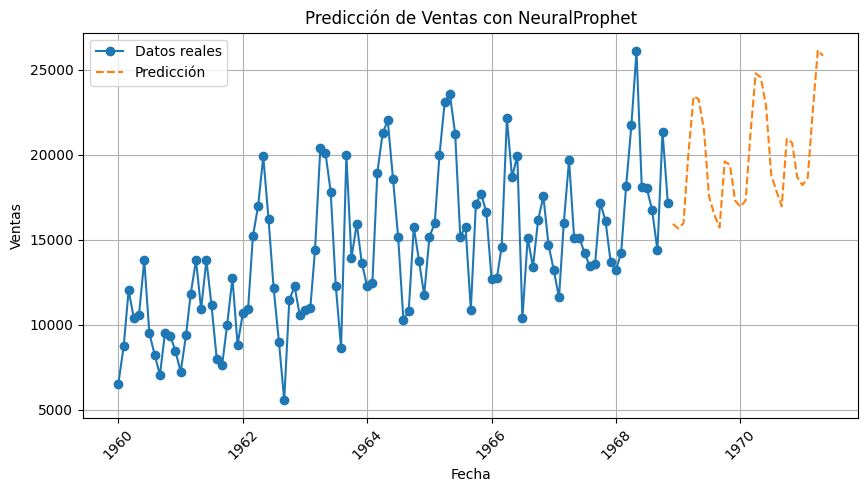

In [5]:
# Instalar paquetes si no están
!pip install neuralprophet matplotlib pandas -q

# Importar librerías
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
file_path = "https://raw.githubusercontent.com/AlmudenaCabello/AC_Modelos/refs/heads/main/monthly-car-salesNP(in).csv"
df = pd.read_csv(file_path)
df["ds"] = pd.to_datetime(df["ds"])

# Crear y entrenar el modelo
model = NeuralProphet()
model.fit(df, freq="M")

# Crear futuro y predecir
future = model.make_future_dataframe(df, periods=30)
forecast = model.predict(future)

# Mostrar predicciones
print("Predicciones de Ventas:")
print(forecast[["ds", "yhat1"]].head(30))

# Crear figura
plt.figure(figsize=(10, 5))
plt.plot(df["ds"], df["y"], label="Datos reales", marker="o")
plt.plot(forecast["ds"], forecast["yhat1"], label="Predicción", linestyle="dashed")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Predicción de Ventas con NeuralProphet")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Guardar gráfico como PDF con texto seleccionable
plt.savefig("prediccion_ventas.pdf", format="pdf")

# Mostrar en pantalla
plt.show()
